In [73]:
import re
import pandas as pd

In [74]:
f = open('../WhatsApp Chat with PESFINAL.txt','r',encoding='utf-8')

In [75]:
data = f.read()

In [76]:
len(data)

35772

In [77]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [78]:
messages = re.split(pattern,data)[1:]

In [79]:
len(messages)

787

In [80]:
dates = re.findall(pattern,data)
len(dates)


787

In [81]:
dates

['1/4/22, 12:16 - ',
 '1/4/22, 12:16 - ',
 '5/23/23, 12:27 - ',
 '5/23/23, 12:28 - ',
 '5/23/23, 12:29 - ',
 '5/23/23, 12:29 - ',
 '5/23/23, 12:33 - ',
 '5/23/23, 14:18 - ',
 '5/23/23, 23:24 - ',
 '5/23/23, 23:38 - ',
 '5/23/23, 23:40 - ',
 '5/23/23, 23:44 - ',
 '5/24/23, 00:28 - ',
 '5/24/23, 01:12 - ',
 '5/24/23, 01:20 - ',
 '5/24/23, 01:22 - ',
 '5/24/23, 01:08 - ',
 '5/24/23, 02:15 - ',
 '5/24/23, 03:44 - ',
 '5/24/23, 08:53 - ',
 '5/24/23, 09:04 - ',
 '5/24/23, 20:36 - ',
 '5/25/23, 17:20 - ',
 '5/27/23, 09:12 - ',
 '5/27/23, 09:51 - ',
 '5/28/23, 19:46 - ',
 '5/28/23, 19:46 - ',
 '5/28/23, 20:04 - ',
 '5/29/23, 16:18 - ',
 '5/29/23, 16:20 - ',
 '5/30/23, 09:42 - ',
 '5/30/23, 09:43 - ',
 '5/30/23, 16:55 - ',
 '5/30/23, 16:56 - ',
 '5/31/23, 00:10 - ',
 '5/31/23, 16:15 - ',
 '5/31/23, 16:17 - ',
 '5/31/23, 18:22 - ',
 '5/31/23, 18:22 - ',
 '5/31/23, 18:22 - ',
 '5/31/23, 18:22 - ',
 '5/31/23, 18:23 - ',
 '5/31/23, 18:24 - ',
 '5/31/23, 18:25 - ',
 '5/31/23, 18:26 - ',
 '5/31/23, 1

In [82]:
df = pd.DataFrame({'user_message':messages,'message_date':dates})
df['message_date'] = pd.to_datetime(df['message_date'],format='%m/%d/%y, %H:%M - ')
df.head()



,user_message,message_date
0,"Krish Mehta Dj created group ""PES""\n",2022-01-04 12:16:00
1,You were added\n,2022-01-04 12:16:00
2,Sonumonu: Friendly tournament mai koi IN hai??\n,2023-05-23 12:27:00
3,Kanishk: In\n,2023-05-23 12:28:00
4,+91 99300 55900: Kab hai\n,2023-05-23 12:29:00


In [83]:
df.head()

,user_message,message_date
0,"Krish Mehta Dj created group ""PES""\n",2022-01-04 12:16:00
1,You were added\n,2022-01-04 12:16:00
2,Sonumonu: Friendly tournament mai koi IN hai??\n,2023-05-23 12:27:00
3,Kanishk: In\n,2023-05-23 12:28:00
4,+91 99300 55900: Kab hai\n,2023-05-23 12:29:00


In [84]:
df.shape

(787, 2)

In [85]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])

    else:
        users.append('group notification')
        messages.append(entry[0])

df['users'] = users
df['messages'] = messages
df.drop(columns=['user_message'],inplace=True)

df.head()

,message_date,users,messages
0,2022-01-04 12:16:00,group notification,"Krish Mehta Dj created group ""PES""\n"
1,2022-01-04 12:16:00,group notification,You were added\n
2,2023-05-23 12:27:00,Sonumonu,Friendly tournament mai koi IN hai??\n
3,2023-05-23 12:28:00,Kanishk,In\n
4,2023-05-23 12:29:00,+91 99300 55900,Kab hai\n


In [86]:
df['year'] = df['message_date'].dt.year 
df['month'] = df['message_date'].dt.month_name()
df['day'] = df['message_date'].dt.day
df['hour'] = df['message_date'].dt.hour
df['minute'] = df['message_date'].dt.minute


In [87]:
df['month'] = df['message_date'].dt.month_name()

In [88]:
df['day'] = df['message_date'].dt.day

In [89]:
df['hour'] = df['message_date'].dt.hour

In [90]:
df['minute'] = df['message_date'].dt.minute

In [91]:
df.head()

,message_date,users,messages,year,month,day,hour,minute
0,2022-01-04 12:16:00,group notification,"Krish Mehta Dj created group ""PES""\n",2022,January,4,12,16
1,2022-01-04 12:16:00,group notification,You were added\n,2022,January,4,12,16
2,2023-05-23 12:27:00,Sonumonu,Friendly tournament mai koi IN hai??\n,2023,May,23,12,27
3,2023-05-23 12:28:00,Kanishk,In\n,2023,May,23,12,28
4,2023-05-23 12:29:00,+91 99300 55900,Kab hai\n,2023,May,23,12,29


In [92]:
df[df['users']=='Sonumonu'].shape[0]

123

In [93]:
words = []
for messages in df['messages']:
    words.extend(messages.split())

In [94]:
len(words)

2346

In [95]:
num_media_messages = df[df['messages'] == '<Media omitted>\n'].shape[0]

In [96]:
num_media_messages

42

In [97]:
x = df['users'].value_counts().head()

In [98]:
import matplotlib.pyplot as plt

In [99]:
name = x.index
count = x.values

c:\Users\meetv\OneDrive\Desktop\ML-PROJECT-5\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129311 (\N{I LOVE YOU HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\meetv\OneDrive\Desktop\ML-PROJECT-5\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


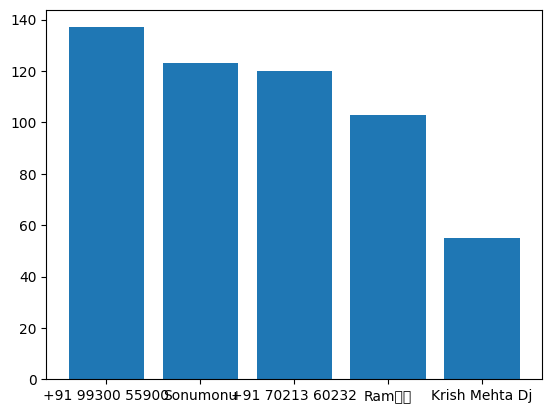

In [100]:
plt.bar(name,count)
plt.xticks
plt.show()

In [101]:
df.head()

,message_date,users,messages,year,month,day,hour,minute
0,2022-01-04 12:16:00,group notification,"Krish Mehta Dj created group ""PES""\n",2022,January,4,12,16
1,2022-01-04 12:16:00,group notification,You were added\n,2022,January,4,12,16
2,2023-05-23 12:27:00,Sonumonu,Friendly tournament mai koi IN hai??\n,2023,May,23,12,27
3,2023-05-23 12:28:00,Kanishk,In\n,2023,May,23,12,28
4,2023-05-23 12:29:00,+91 99300 55900,Kab hai\n,2023,May,23,12,29


In [102]:
temp = df[df['users'] != 'group notification']
temp = temp[temp['messages'] != '<Media omitted>\n']

In [103]:
f = open('../hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [104]:
words = []
for message in temp['messages']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [105]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,group,31
1,aaja,28
2,code,24
3,gg,23
4,bhej,18
5,send,17
6,manav,16
7,sylvester,15
8,bijo,15
9,boka,14


In [106]:
import emoji

In [107]:
emojis = []
for message in df['messages']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [108]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🫡,18
1,👍,10
2,😂,7
3,♥,4
4,💯,3
5,🙌,3
6,🏽,3
7,🏻,3
8,🏾,3
9,🎊,2


In [109]:
df['month_num'] = df['message_date'].dt.month

In [110]:
df

,message_date,users,messages,year,month,day,hour,minute,month_num
0,2022-01-04 12:16:00,group notification,"Krish Mehta Dj created group ""PES""\n",2022,January,4,12,16,1
1,2022-01-04 12:16:00,group notification,You were added\n,2022,January,4,12,16,1
2,2023-05-23 12:27:00,Sonumonu,Friendly tournament mai koi IN hai??\n,2023,May,23,12,27,5
3,2023-05-23 12:28:00,Kanishk,In\n,2023,May,23,12,28,5
4,2023-05-23 12:29:00,+91 99300 55900,Kab hai\n,2023,May,23,12,29,5
...,...,...,...,...,...,...,...,...,...
782,2023-06-11 17:50:00,+91 99300 55900,Koi khelega???\n,2023,June,11,17,50,6
783,2023-06-11 17:50:00,+91 99300 55900,Co op??\n,2023,June,11,17,50,6
784,2023-06-11 17:52:00,+91 70213 60232,1v1\n,2023,June,11,17,52,6
785,2023-06-11 22:56:00,Sonumonu,2v2\n,2023,June,11,22,56,6


In [111]:
timeline = df.groupby(['year','month_num','month']).count()['messages'].reset_index()

In [112]:
timeline

,year,month_num,month,messages
0,2022,1,January,2
1,2023,5,May,57
2,2023,6,June,728


In [113]:
timeline['year'] = timeline['year'].astype(str)

In [114]:
timeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       3 non-null      object
 1   month_num  3 non-null      int64 
 2   month      3 non-null      object
 3   messages   3 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 224.0+ bytes


In [115]:
df['only_date'] = df['message_date'].dt.date

In [117]:
timeline = df.groupby('only_date').count()['messages'].reset_index()

In [118]:
timeline

,only_date,messages
0,2022-01-04,2
1,2023-05-23,10
2,2023-05-24,10
3,2023-05-25,1
4,2023-05-27,2
5,2023-05-28,3
6,2023-05-29,2
7,2023-05-30,4
8,2023-05-31,25
9,2023-06-01,93


In [119]:
df.head()

,message_date,users,messages,year,month,day,hour,minute,month_num,only_date
0,2022-01-04 12:16:00,group notification,"Krish Mehta Dj created group ""PES""\n",2022,January,4,12,16,1,2022-01-04
1,2022-01-04 12:16:00,group notification,You were added\n,2022,January,4,12,16,1,2022-01-04
2,2023-05-23 12:27:00,Sonumonu,Friendly tournament mai koi IN hai??\n,2023,May,23,12,27,5,2023-05-23
3,2023-05-23 12:28:00,Kanishk,In\n,2023,May,23,12,28,5,2023-05-23
4,2023-05-23 12:29:00,+91 99300 55900,Kab hai\n,2023,May,23,12,29,5,2023-05-23


In [121]:
df['day_name'] = df['message_date'].dt.day_name()

In [122]:
df['day_name'].value_counts()

Sunday       213
Saturday     146
Wednesday    114
Thursday     111
Monday        97
Tuesday       72
Friday        34
Name: day_name, dtype: int64

In [123]:
df['month'].value_counts()

June       728
May         57
January      2
Name: month, dtype: int64

In [124]:
df.head()

,message_date,users,messages,year,month,day,hour,minute,month_num,only_date,day_name
0,2022-01-04 12:16:00,group notification,"Krish Mehta Dj created group ""PES""\n",2022,January,4,12,16,1,2022-01-04,Tuesday
1,2022-01-04 12:16:00,group notification,You were added\n,2022,January,4,12,16,1,2022-01-04,Tuesday
2,2023-05-23 12:27:00,Sonumonu,Friendly tournament mai koi IN hai??\n,2023,May,23,12,27,5,2023-05-23,Tuesday
3,2023-05-23 12:28:00,Kanishk,In\n,2023,May,23,12,28,5,2023-05-23,Tuesday
4,2023-05-23 12:29:00,+91 99300 55900,Kab hai\n,2023,May,23,12,29,5,2023-05-23,Tuesday


In [125]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period


In [127]:
df.head()

,message_date,users,messages,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2022-01-04 12:16:00,group notification,"Krish Mehta Dj created group ""PES""\n",2022,January,4,12,16,1,2022-01-04,Tuesday,12-13
1,2022-01-04 12:16:00,group notification,You were added\n,2022,January,4,12,16,1,2022-01-04,Tuesday,12-13
2,2023-05-23 12:27:00,Sonumonu,Friendly tournament mai koi IN hai??\n,2023,May,23,12,27,5,2023-05-23,Tuesday,12-13
3,2023-05-23 12:28:00,Kanishk,In\n,2023,May,23,12,28,5,2023-05-23,Tuesday,12-13
4,2023-05-23 12:29:00,+91 99300 55900,Kab hai\n,2023,May,23,12,29,5,2023-05-23,Tuesday,12-13


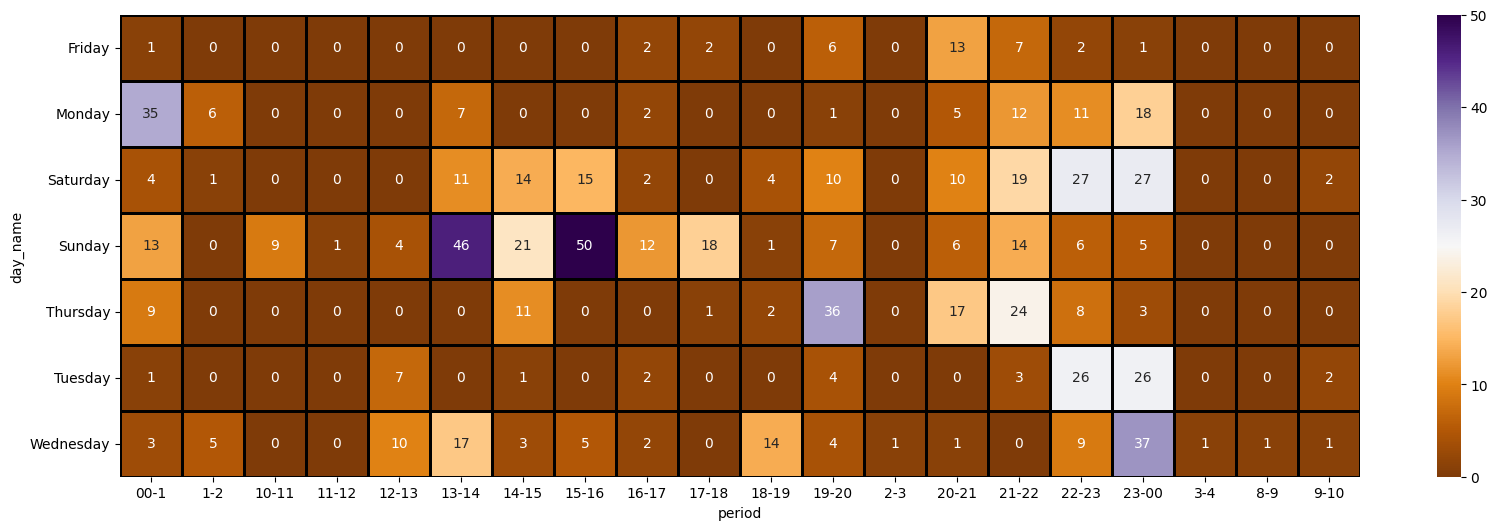

In [130]:
import seaborn as sns
plt.figure(figsize=(20,6))
table = df.pivot_table(index='day_name',columns='period',values='messages',aggfunc='count').fillna(0)
sns.heatmap(table,annot=True,linewidths=1,linecolor='black',cmap='PuOr')
plt.show()